In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install -q emoji
import re
import emoji
import pandas as pd
import matplotlib.pyplot as plt
import json

In [ ]:
data_file = "/content/gdrive/MyDrive/TelegramData/telegram_dataset.json"


with open(data_file, 'r') as f:
  data = json.load(f)

len(data), type(data)

(5002, list)

In [ ]:
corpus = {}
for ind, keys in enumerate(data):
    post = keys['post_text']
    corpus[post] = corpus.get(post, [])
    for _, x in enumerate(keys['comments']):
      corpus[post].append(x['text'])

print(f"Количество уникальных постов: {len(corpus.values())}")
print(f"Количество всех комментариев: {len([x for y in corpus.values() for x in y])}")

Количество уникальных постов: 4967
Количество всех комментариев: 14431


Средняя длина комментария: 20.5
Количество комментариев с количеством слов меньше 5: 3227
Количество комментариев с количеством слов больше 100: 743


(array([1.3669e+04, 5.4600e+02, 1.2500e+02, 3.8000e+01, 2.0000e+01,
        1.5000e+01, 7.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  1. ,  69.4, 137.8, 206.2, 274.6, 343. , 411.4, 479.8, 548.2,
        616.6, 685. ]),
 <BarContainer object of 10 artists>)

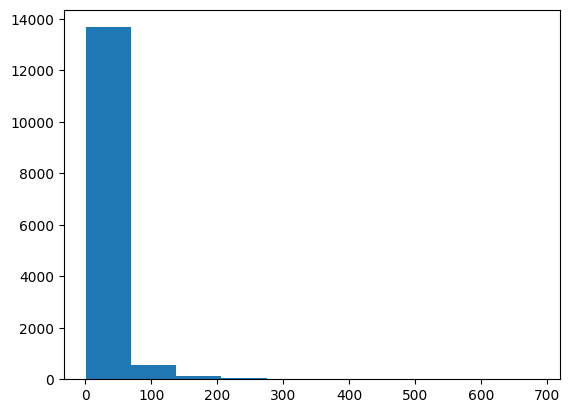

In [ ]:
len_list = [len(x.split()) for y in corpus.values() for x in y]
print(f"Средняя длина комментария: {round(sum(len_list) / len(len_list), 1)}")
print(f"Количество комментариев с количеством слов меньше 5: {len(list(filter(lambda x: x < 5, len_list)))}")
print(f"Количество комментариев с количеством слов больше 100: {len(list(filter(lambda x: x > 70, len_list)))}")
plt.hist(len_list)

In [ ]:
def clean_text_dict(data: dict[str, list[str]]) -> dict[str, list[str]]:
    """
    Принимает словарь вида {строка: [строка, строка, ...]}
    Удаляет ссылки, заменят смайлики на их текстовое описание и оставляет строки только с 5-200 словами
    Возвращает новый словарь
    """

    cleaned_data = {}

    for key, texts in data.items():
        cleaned_texts = []

        # заменяем смайл на текст
        key = emoji.demojize(key, delimiters=("эмодзи_", "_ "), language="ru")

        for text in texts:
            if not isinstance(text, str):
                continue

            # удаляем ссылки
            text = re.sub(r'\bhttp\S+', '', text)

            # заменяем смайл на текст
            text = emoji.demojize(text, delimiters=("эмодзи_", "_ "), language="ru")

            # нормализуем пробелы
            text = re.sub(r'\s+', ' ', text).strip()

            word_count = len(text.split())

            if 5 <= word_count <= 70:
                cleaned_texts.append(text)

        if cleaned_texts and len(key.split()) >= 5:
            cleaned_data[key] = cleaned_texts

    return cleaned_data

In [ ]:
data = clean_text_dict(corpus)
print(f"Количество уникальных постов: {len(data.values())}")
print(f"Количество всех комментариев: {len([x for y in data.values() for x in y])}")
len_list_clean = [len(x.split()) for y in data.values() for x in y]
print(f"Средняя длина комментария: {round(sum(len_list) / len(len_list), 1)}")
print(f"Количество комментариев с количеством слов меньше 5: {len(list(filter(lambda x: x < 5, len_list)))}")
print(f"Количество комментариев с количеством слов больше 200: {len(list(filter(lambda x: x > 200, len_list)))}")

Количество уникальных постов: 4739
Количество всех комментариев: 10516
Средняя длина комментария: 17.9
Количество комментариев с количеством слов меньше 5: 0
Количество комментариев с количеством слов больше 200: 0


(array([4697., 2053., 1354.,  705.,  589.,  345.,  284.,  183.,  163.,
         143.]),
 array([ 5. , 11.5, 18. , 24.5, 31. , 37.5, 44. , 50.5, 57. , 63.5, 70. ]),
 <BarContainer object of 10 artists>)

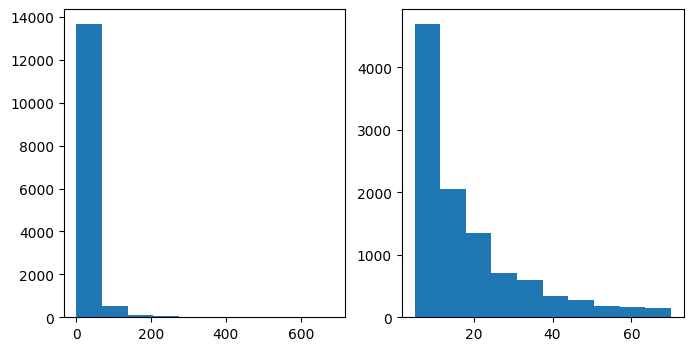

In [ ]:
axes, figs = plt.subplots(1, 2, figsize=(8, 4))
figs[0].hist(len_list)
figs[1].hist(len_list_clean)

In [ ]:
save_file = "/content/gdrive/MyDrive/TelegramData/clean_dataset.json"


with open(save_file, 'w') as f:
  json.dump(data, f, ensure_ascii=False)

## Сделаем разбиение выборки на train, val, test

In [ ]:
clean_file = "/content/gdrive/MyDrive/TelegramData/clean_dataset.json"

with open(clean_file, 'r') as f:
  json.load()